## This visualisation project aims to visualise the data of global billionaires by different metrics

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as stl
import seaborn as sns
import plotly.express as px
import squarify
from ChromaPalette.chroma_palette import *
import mpl_extra.treemap as tr
from geopy.geocoders import Nominatim
import time
from geopy.exc import GeocoderUnavailable
from mpl_toolkits.basemap import Basemap

%matplotlib inline

/Users/chengyanggu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# import dataset
billionaire = pd.read_csv('Data/Billionaires Statistics Dataset.csv')

In [3]:
# select top 50 and relevant columns
top50_billionaire = billionaire.head(50)[['finalWorth', 'category', 'personName']]

In [4]:
# generate color palette
color_list = color_palette(name="Sunrise",N=len(top50_billionaire['category'].unique()))

In [5]:
# sort by category to group the same industries together
top50_billionaire = top50_billionaire.sort_values(by = 'category')

In [6]:
# create treemap label
top50_billionaire['wealth_lable'] = '$' + round(top50_billionaire['finalWorth']/1000, 2).astype(str) + 'M'
labels = top50_billionaire['personName'].str.cat(top50_billionaire['wealth_lable'], sep = '\n')

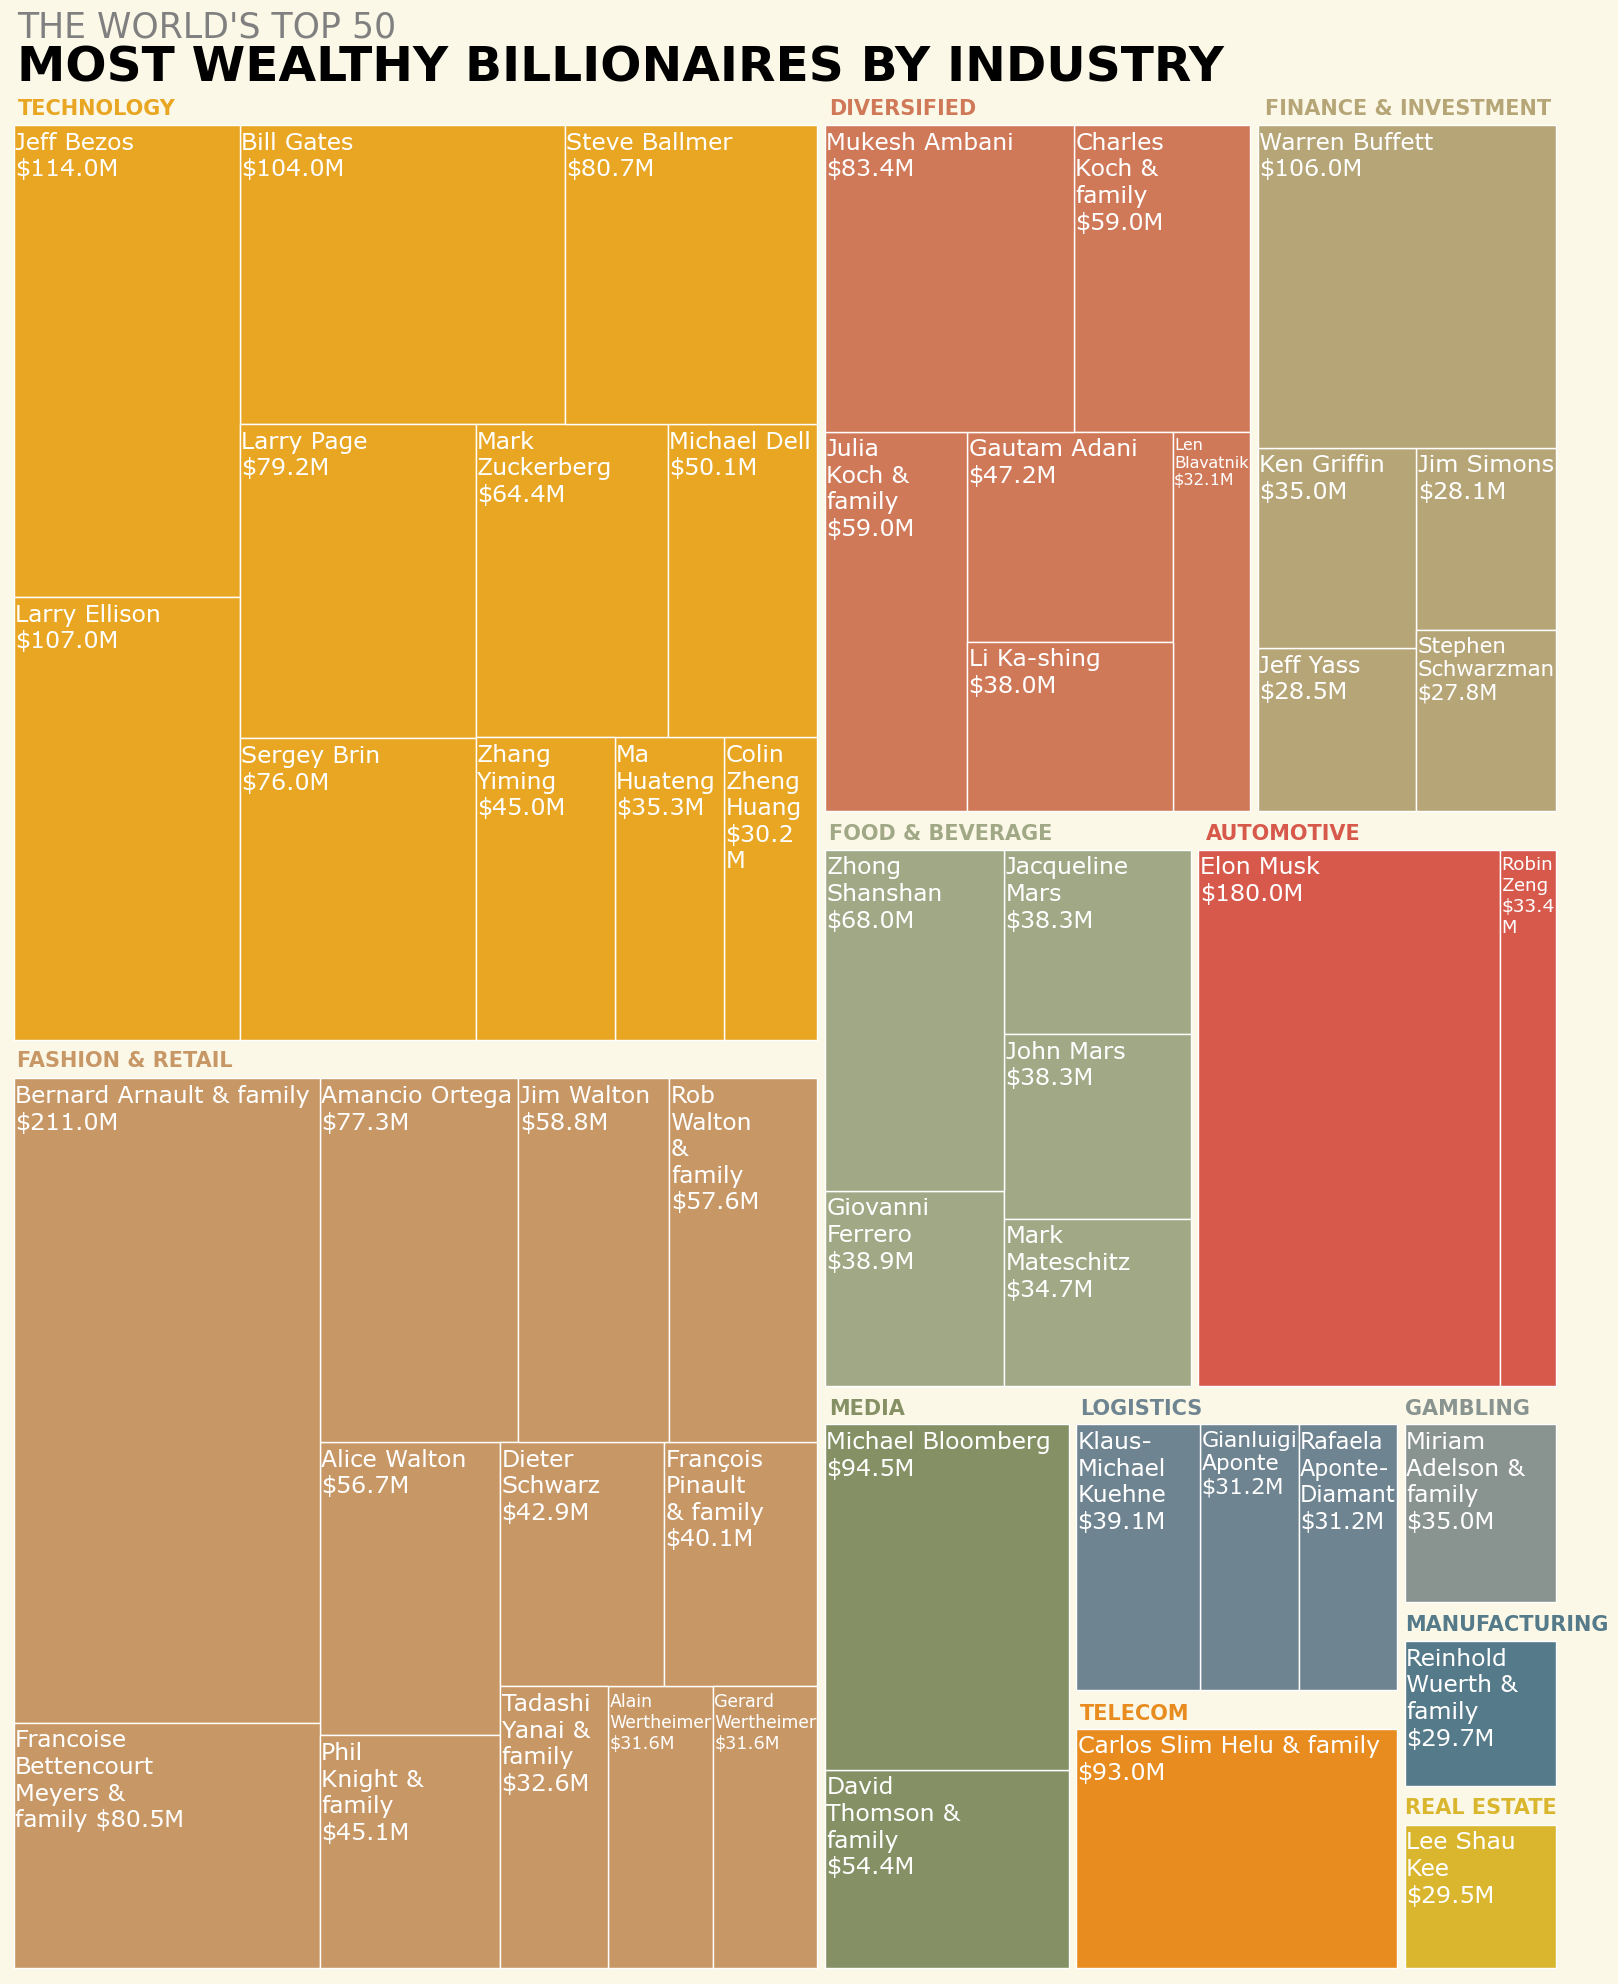

In [7]:
# generate the plot
fig, ax = plt.subplots(figsize=(20,28), dpi=100, subplot_kw=dict(aspect=1.5))

fig.patch.set_facecolor('#fbf8e7')

trc = tr.treemap(
    ax, top50_billionaire, area='finalWorth', levels=['category', 'personName'], norm_y=170, norm_x = 210, top=True,
    fill='category', labels=labels,
    cmap=color_list,
    rectprops=dict(ec='w', pad=(0.5,0.5,0.5,3)),
    textprops=dict(fontfamily='verdana', reflow=True, place='top left', grow=True,
                  max_fontsize=17, color='w', pady=3, padx=1, fontstyle='normal'),
    subgroup_rectprops={'category':dict(ec='#fbf8e7', fc='#fbf8e7')},
    #subgroup_textprops={'category':dict(place='top center', max_fontsize=10, 
                                  #fontfamily='verdana', c='w')},
)

# add titles
ax.text(1, 175, "THE WORLD'S TOP 50", size = 25, color = 'gray')
ax.text(1, 171, "MOST WEALTHY BILLIONAIRES BY INDUSTRY", size = 35, weight = 'bold')

# add industry cat
ax.text(1, 168, "TECHNOLOGY", size = 15, weight = 'bold', color = color_list[10])
ax.text(111, 168, "DIVERSIFIED", size = 15, weight = 'bold', color = color_list[1])
ax.text(170, 168, "FINANCE & INVESTMENT", size = 15, weight = 'bold', color = color_list[3])
ax.text(1, 82, "FASHION & RETAIL", size = 15, weight = 'bold', color = color_list[2])
ax.text(111, 102.5, "FOOD & BEVERAGE", size = 15, weight = 'bold', color = color_list[4])
ax.text(162, 102.5, "AUTOMOTIVE", size = 15, weight = 'bold', color = color_list[0])
ax.text(111, 50.5, "MEDIA", size = 15, weight = 'bold', color = color_list[8])
ax.text(145, 50.5, "LOGISTICS", size = 15, weight = 'bold', color = color_list[6])
ax.text(189, 50.5, "GAMBLING", size = 15, weight = 'bold', color = color_list[5])
ax.text(145, 23, "TELECOM", size = 15, weight = 'bold', color = color_list[11])
ax.text(189, 31, "MANUFACTURING", size = 15, weight = 'bold', color = color_list[7])
ax.text(189, 14.5, "REAL ESTATE", size = 15, weight = 'bold', color = color_list[9])

ax.axis('off')


plt.show()

In [8]:
# create a function to get the coordinates of a city
def get_coordinates(city_name, max_retries=3, backoff_factor=2):
    geolocator = Nominatim(user_agent="city_locator")
    retries = 0
    while retries < max_retries:
        try:
            location = geolocator.geocode(city_name)
            if location:
                return location.latitude, location.longitude
            else:
                return None
        except GeocoderUnavailable as e:
            retries += 1
            delay = backoff_factor ** retries
            time.sleep(delay)
    return None

This chunk of code is data cleaning process. Given the unstable nature of Geocode, the clearning codes have been commented and the cleaned dataset has been saved, so when the code is rerun, it uses the cleaned data directly

In [9]:
# billionaire_city = billionaire[['city']].head(50)


# there is one null value, which should have been Hong Kong, replace the null value with 'Hong Kong'

#billionaire_city['city'][32] = 'Hong Kong'


# fetch the coordinates of cities

# billionaire_city['coordinates'] = billionaire_city['city'].apply(get_coordinates)


# get the longtitude and latitude

# billionaire_city['lat'] = [item[0] for item in billionaire_city['coordinates']]
# billionaire_city['lon'] = [item[1] for item in billionaire_city['coordinates']]


# drop the coordinates column
# billionaire_city['n'] = billionaire_city['city'].map(dict(billionaire_city['city'].value_counts()))
# billionaire_city.drop('coordinates', axis = 1, inplace = True)


# billionaire_city.to_csv('billionaire_city_cleaned.csv', index = False)

In [10]:
# read cleaned data
cleaned_city_data = pd.read_csv('billionaire_city_cleaned.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'billionaire_city_cleaned.csv'

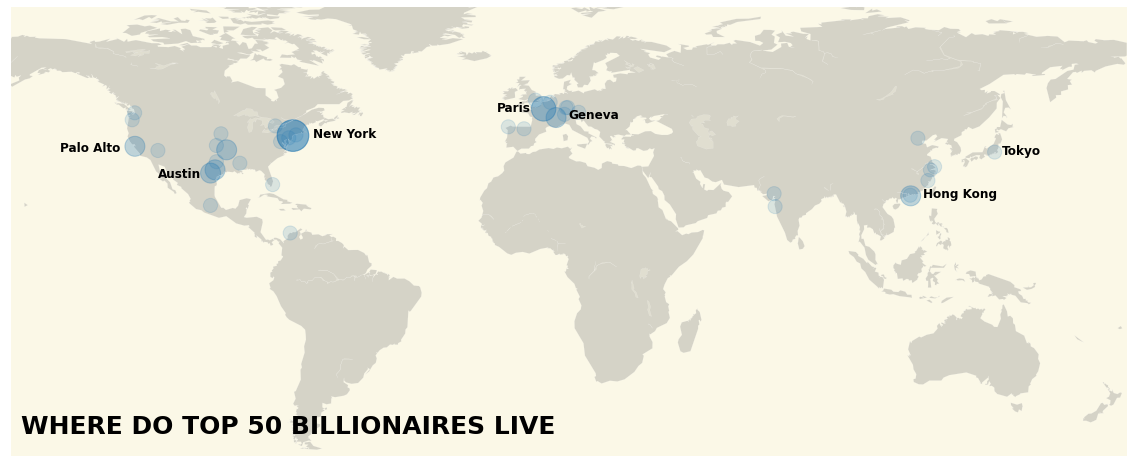

In [ ]:
fig = plt.figure(figsize = (20, 22))

m=Basemap(llcrnrlon=-160, llcrnrlat=-57, urcrnrlon=180, urcrnrlat=80);
m.drawmapboundary(fill_color='#fbf8e7', linewidth=0);
m.fillcontinents(color='grey', alpha=0.3);
m.drawcoastlines(linewidth=0.1, color="white");

m.scatter(
    x=cleaned_city_data['lon'], 
    y=cleaned_city_data['lat'],
    s=cleaned_city_data['n']*200,
    alpha = 0.15,
    cmap="Set1"
)

plt.text(-68, 40, 'New York', size = 12, weight = 'bold')
plt.text(-145, 36, 'Palo Alto', size = 12, weight = 'bold')
plt.text(-12, 48, 'Paris', size = 12, weight = 'bold')
plt.text(118, 22, 'Hong Kong', size = 12, weight = 'bold')
plt.text(142, 35, 'Tokyo', size = 12, weight = 'bold')
plt.text(10, 46, 'Geneva', size = 12, weight = 'bold')
plt.text(-115, 28, 'Austin', size = 12, weight = 'bold')


plt.text(-157, -50, 'WHERE DO TOP 50 BILLIONAIRES LIVE', size = 25, weight = 'bold');